# 로이터통신 데이터셋
---
* 짧은 뉴스기사와 토픽의 집합( 1986년 공개)
* 46개의 토픽(비율은 고정적이지 않음)
* 각 토픽은 최소 10개 이상의 샘플이 들어 있음
* 학습 데이터: 8,982 | 테스트 데이터: 2,246

In [137]:
from tensorflow.keras.datasets import reuters
import tensorflow.keras
import pandas as pd


(train_data, train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

## 데이터셋 확인

In [138]:
train_df = pd.DataFrame(train_data)
train_df

,0
0,"[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, ..."
1,"[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56,..."
2,"[1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32,..."
3,"[1, 4, 686, 867, 558, 4, 37, 38, 309, 2276, 46..."
4,"[1, 8295, 111, 8, 25, 166, 40, 638, 10, 436, 2..."
...,...
8977,"[1, 313, 262, 2529, 1426, 8, 130, 40, 129, 363..."
8978,"[1, 4, 96, 5, 340, 3976, 23, 328, 6, 154, 7, 4..."
8979,"[1, 141, 3890, 387, 81, 8, 16, 1629, 10, 340, ..."
8980,"[1, 53, 46, 957, 26, 14, 74, 132, 26, 39, 46, ..."


In [139]:
train_df['target'] = pd.DataFrame(train_labels)
train_df.rename(columns={0:'sequence'},inplace=True)
train_df

,sequence,target
0,"[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, ...",3
1,"[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56,...",4
2,"[1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32,...",3
3,"[1, 4, 686, 867, 558, 4, 37, 38, 309, 2276, 46...",4
4,"[1, 8295, 111, 8, 25, 166, 40, 638, 10, 436, 2...",4
...,...,...
8977,"[1, 313, 262, 2529, 1426, 8, 130, 40, 129, 363...",19
8978,"[1, 4, 96, 5, 340, 3976, 23, 328, 6, 154, 7, 4...",19
8979,"[1, 141, 3890, 387, 81, 8, 16, 1629, 10, 340, ...",25
8980,"[1, 53, 46, 957, 26, 14, 74, 132, 26, 39, 46, ...",3


In [140]:
test_df = pd.DataFrame(test_data)
test_df.rename(columns={0:'sequence'},inplace=True)
test_df['target'] = pd.DataFrame(test_labels)
test_df

,sequence,target
0,"[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 1...",3
1,"[1, 2768, 283, 122, 7, 4, 89, 544, 463, 29, 79...",10
2,"[1, 4, 309, 2276, 4759, 5, 2015, 403, 1920, 33...",1
3,"[1, 2, 2, 65, 9, 249, 1096, 8, 16, 515, 4, 211...",4
4,"[1, 470, 354, 2, 4231, 62, 2373, 509, 1687, 51...",4
...,...,...
2241,"[1, 56, 2459, 1943, 3620, 81, 8, 16, 731, 10, ...",3
2242,"[1, 53, 46, 425, 26, 14, 74, 119, 26, 39, 46, ...",8
2243,"[1, 1809, 124, 53, 653, 26, 39, 5439, 18, 14, ...",3
2244,"[1, 5586, 2, 71, 8, 23, 166, 344, 10, 78, 13, ...",3


In [141]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8982 entries, 0 to 8981
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  8982 non-null   object
 1   target    8982 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 140.5+ KB


In [142]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  2246 non-null   object
 1   target    2246 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 35.2+ KB


## 인코딩 - 디코딩

* VOCA, 단어집 확인 및 인덱스 넘버로 단어 가져올 수 있도록 처리

In [143]:
word_index = reuters.get_word_index()
word_index


{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [144]:
reversed_word_index = dict((value,key) for (key,value) in word_index.items())
reversed_word_index

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

* 하나만 디코딩 해보기 + 디코딩 제대로 되고 있는지 체크

In [145]:
# 문장 하나 디코딩
' '.join([reversed_word_index.get(i-3,'?') for i in train_data[1]])

'? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3'

In [146]:
train_data[1][:10]

[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56]

In [147]:
sorted(reversed_word_index.items())[55-3]

(53, 'lt')

In [148]:
' '.join([reversed_word_index.get(i-3,'?') for i in train_data[1][:10]])

'? generale de banque sa lt ? br and lt'

## vectorize

In [149]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results


In [150]:
# 훈련 데이터셋을 벡터로 변환
x_train = vectorize_sequences(train_data).astype('float32')
print(x_train[0])

# 테스트 데이터셋을 벡터로 변환
x_test = vectorize_sequences(test_data).astype('float32')
print(type(x_test[0]))

# 타겟 값들도 46개로 다중 분류이므로 벡터 변환 해주어야 함
y_train_encoded = vectorize_sequences(train_labels,46).astype('float32')
y_test_encoded = vectorize_sequences(test_labels,46).astype('float32')

[0. 1. 1. ... 0. 0. 0.]
<class 'numpy.ndarray'>


## 딥러닝

### 모델 설계 및 훈련(검증 포함)

In [151]:
len(partial_x_train[0])

10000

In [152]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(16, input_dim=10000, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

x_val = x_train[:1500].astype(float)
partial_x_train = x_train[1500:].astype(float)

y_val = y_train_encoded[:1500].astype(float)
partial_y_train = y_train_encoded[1500:].astype(float)

training = model.fit(partial_x_train,partial_y_train, epochs=50, batch_size=90, validation_data=(x_val,y_val))

Epoch 1/100
84/84 [==============================] - 1s 9ms/step - loss: 2.7647 - accuracy: 0.4354 - val_loss: 1.7697 - val_accuracy: 0.6053
Epoch 2/100
84/84 [==============================] - 0s 6ms/step - loss: 1.4210 - accuracy: 0.6872 - val_loss: 1.3839 - val_accuracy: 0.6920
Epoch 3/100
84/84 [==============================] - 0s 5ms/step - loss: 1.0702 - accuracy: 0.7626 - val_loss: 1.2211 - val_accuracy: 0.7340
Epoch 4/100
84/84 [==============================] - 0s 6ms/step - loss: 0.8357 - accuracy: 0.8160 - val_loss: 1.1340 - val_accuracy: 0.7613
Epoch 5/100
84/84 [==============================] - 1s 6ms/step - loss: 0.6695 - accuracy: 0.8574 - val_loss: 1.0865 - val_accuracy: 0.7747
Epoch 6/100
84/84 [==============================] - 0s 6ms/step - loss: 0.5412 - accuracy: 0.8821 - val_loss: 1.0654 - val_accuracy: 0.7727
Epoch 7/100
84/84 [==============================] - 0s 6ms/step - loss: 0.4426 - accuracy: 0.8976 - val_loss: 1.0613 - val_accuracy: 0.7760
Epoch 8/100
8

### 훈련 히스토리 확인 및 과적합 방지

In [153]:
training.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [154]:
import matplotlib.pyplot as plt

loss = training.history['loss']
val_loss = training.history['val_loss']
acc = training.history['accuracy']
val_acc = training.history['val_accuracy']

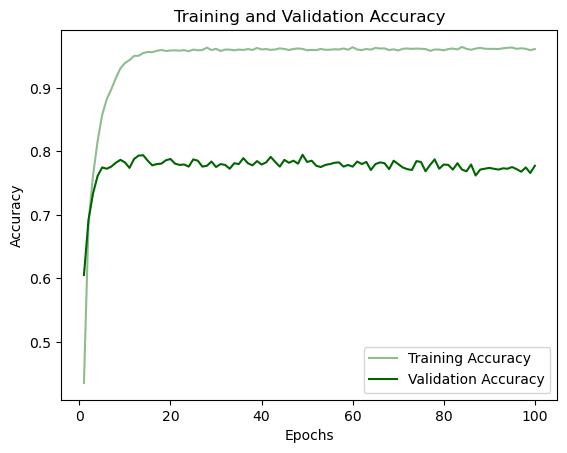

In [155]:
plt.clf()       #그래프 초기화

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, label='Training Accuracy', color='darkseagreen')
plt.plot(epochs, val_acc, label='Validation Accuracy', color='darkgreen')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

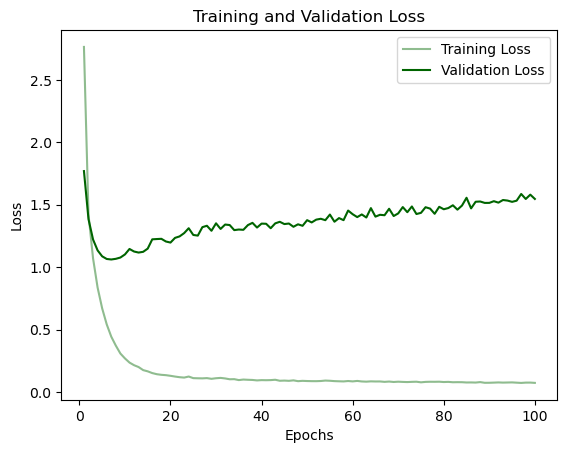

In [156]:
plt.clf()       #그래프 초기화

epochs = range(1, len(acc)+1)
plt.plot(epochs, loss, label='Training Loss', color='darkseagreen')
plt.plot(epochs, val_loss, label='Validation Loss', color='darkgreen')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 모델 fix 및 테스트

In [157]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(16, input_dim=10000, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# x_val = x_train[:1500].astype(float)
# partial_x_train = x_train[1500:].astype(float)

# y_val = y_train[:1500].astype(float)
# partial_y_train = y_train[1500:].astype(float)

training = model.fit(x_train,y_train_encoded, epochs=10, batch_size=90)

Epoch 1/10
100/100 [==============================] - 2s 10ms/step - loss: 2.6429 - accuracy: 0.4829
Epoch 2/10
100/100 [==============================] - 1s 9ms/step - loss: 1.4000 - accuracy: 0.6756
Epoch 3/10
100/100 [==============================] - 1s 9ms/step - loss: 1.0652 - accuracy: 0.7607
Epoch 4/10
100/100 [==============================] - 1s 11ms/step - loss: 0.8489 - accuracy: 0.7974
Epoch 5/10
100/100 [==============================] - 1s 10ms/step - loss: 0.6879 - accuracy: 0.8363
Epoch 6/10
100/100 [==============================] - 1s 10ms/step - loss: 0.5567 - accuracy: 0.8613
Epoch 7/10
100/100 [==============================] - 1s 10ms/step - loss: 0.4581 - accuracy: 0.8874
Epoch 8/10
100/100 [==============================] - 1s 9ms/step - loss: 0.3775 - accuracy: 0.9108
Epoch 9/10
100/100 [==============================] - 1s 9ms/step - loss: 0.3185 - accuracy: 0.9224
Epoch 10/10
100/100 [==============================] - 1s 10ms/step - loss: 0.2711 - accuracy: 

* 정확도

In [158]:
print('/n Accuracy: %s' % model.evaluate(x_test, y_test))

71/71 [==============================] - 1s 3ms/step - loss: 1.1083 - accuracy: 0.7747
/n Accuracy: [1.1083214282989502, 0.7747105956077576]


* 그 외 metrics by chatGPT

In [159]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming 'model' is your trained model and 'x_test', 'y_test' are your test data
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


71/71 [==============================] - 0s 4ms/step
Precision: 0.7646563455897953
Recall: 0.7747105966162066
F1 Score: 0.7624532991416073


/Users/brielle/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* sparsel

In [161]:
model = Sequential()

model.add(Dense(16, input_dim=10000, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

x_val = x_train[:1500].astype(float)
partial_x_train = x_train[1500:].astype(float)

y_val = train_labels[:1500].astype(float)
partial_y_train = test_labels[1500:].astype(float)

training = model.fit(partial_x_train,partial_y_train, epochs=10, batch_size=90, validation_data=(x_val,y_val))
results= model.evaluate(x_test, test_labels)

ValueError: Data cardinality is ambiguous:
  x sizes: 7482
  y sizes: 746
Make sure all arrays contain the same number of samples.

##### 혼자 뭔가 해본 흔적

In [162]:
predict_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,3.330643e-07,1.474028e-07,1.339982e-08,8.520287e-01,0.136677,2.085079e-07,8.185982e-07,9.882649e-05,7.840667e-03,3.185245e-06,5.939576e-07,3.366877e-04,4.588827e-06,5.961998e-05,6.411869e-07,0.000049,0.000083,7.098210e-06,8.129124e-08,8.145134e-04,0.000442,6.483430e-05,7.818302e-07,9.137642e-04,1.720959e-07,6.632650e-05,3.356207e-08,9.572190e-05,1.186167e-08,3.557899e-05,3.485864e-05,1.233300e-05,9.689551e-07,1.637741e-05,2.887633e-06,0.000043,5.412410e-05,5.196585e-06,3.458737e-05,1.120689e-04,3.414704e-07,1.975676e-05,3.380652e-05,6.378989e-09,5.371809e-06,5.762173e-07
1,3.055244e-02,2.998110e-03,9.203062e-02,5.143485e-11,0.000127,2.277426e-04,1.322304e-04,9.339002e-10,3.404995e-08,1.027273e-06,5.273104e-01,1.573430e-07,4.628502e-04,1.030055e-05,1.380386e-04,0.000595,0.000151,1.976844e-03,4.705943e-06,4.249752e-07,0.000556,6.504565e-08,2.866188e-03,6.899908e-08,3.287965e-01,3.362180e-09,6.875122e-03,5.686253e-04,4.319735e-04,5.333196e-07,6.496697e-10,1.077223e-05,2.299599e-03,4.050504e-07,3.444911e-07,0.000005,2.991966e-07,5.489609e-06,5.947712e-08,1.483703e-04,2.721445e-07,1.117250e-06,9.536490e-09,3.630196e-06,6.288372e-08,7.104624e-04
2,3.615731e-04,8.977157e-01,1.048119e-03,6.819177e-05,0.000004,1.353177e-02,1.115557e-03,6.122096e-06,1.235524e-05,3.279021e-04,2.061944e-03,1.049964e-04,1.718185e-03,1.566782e-06,4.179753e-03,0.003754,0.002574,3.319252e-04,1.379375e-02,1.279492e-04,0.003892,4.388880e-06,1.471519e-02,9.898905e-07,6.015203e-03,3.579241e-08,4.856887e-05,8.016351e-04,2.430005e-03,1.879226e-04,2.346958e-05,2.723773e-05,1.020780e-05,8.314876e-06,1.127581e-03,0.000155,4.535591e-04,7.382108e-06,2.812380e-05,3.439089e-05,4.195014e-06,3.586230e-05,4.547401e-07,2.712685e-02,2.563464e-07,2.322275e-05
3,4.337521e-06,3.285728e-06,1.510052e-05,8.062187e-03,0.747508,7.136954e-06,7.313228e-06,3.237860e-05,2.094146e-03,3.306492e-04,3.395311e-05,3.323211e-04,1.296907e-04,8.557854e-04,3.486360e-06,0.000090,0.217118,3.095380e-03,7.628662e-08,5.905215e-04,0.002436,7.474201e-06,1.914938e-05,4.453156e-03,3.463213e-04,2.115380e-05,9.288324e-05,1.682197e-04,3.176166e-06,2.692618e-05,1.061840e-05,4.413060e-04,3.009130e-04,6.856970e-04,3.300800e-06,0.000027,3.484911e-06,1.121194e-05,6.125899e-06,8.531720e-03,4.358713e-05,1.974242e-03,2.441281e-05,3.196970e-08,1.842226e-05,2.980545e-05
4,8.791286e-07,3.965278e-06,2.525041e-04,1.355595e-07,0.000047,6.581652e-07,1.940094e-06,1.896835e-07,4.292670e-05,3.241090e-05,1.091973e-04,8.802962e-03,7.562881e-04,9.718437e-01,1.826887e-08,0.000009,0.009056,4.257910e-03,4.719695e-09,1.571464e-04,0.000874,1.264143e-05,1.640787e-05,1.884885e-05,1.550984e-06,1.190905e-03,3.076485e-07,3.368014e-06,4.247100e-07,8.356589e-07,3.766288e-08,1.849087e-04,8.480937e-05,3.742753e-06,1.551356e-04,0.000001,1.783879e-03,5.806769e-07,2.009475e-09,8.529027e-05,1.650536e-04,4.508110e-07,3.071931e-05,2.714251e-08,5.220217e-07,9.432964e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,1.504027e-04,1.270775e-03,5.652897e-05,5.777517e-01,0.360771,2.633005e-04,1.934965e-04,7.197957e-04,8.051169e-03,3.384475e-04,3.467072e-04,3.707977e-03,7.261617e-04,2.356488e-04,4.119485e-04,0.002908,0.003885,1.596877e-04,9.496480e-05,2.152616e-02,0.003245,6.310916e-04,8.986886e-05,8.888702e-04,2.849576e-04,2.568381e-04,3.021100e-04,2.317426e-03,1.051082e-05,2.569151e-04,1.712543e-04,3.619334e-05,3.596078e-04,5.930898e-04,4.576018e-05,0.000838,2.971129e-04,4.753335e-05,1.110044e-03,1.494816e-03,2.854752e-04,1.065097e-03,1.700768e-03,9.381910e-06,5.247296e-05,4.217334e-05
2242,6.240482e-11,9.346551e-07,1.690486e-11,9.998635e-01,0.000023,2.828887e-08,2.072494e-08,5.311870e-07,5.342864e-06,6.695404e-08,3.428695e-09,1.784973e-05,4.948744e-07,2.690035e-08,2.495175e-08,0.00

In [163]:
predicted_classes = np.argmax(predict_df, axis=1)
predicted_classes

array([ 3, 10,  1, ...,  3,  3,  1])

In [175]:
np.sum(predictions[0])

1.0

In [165]:
evaluate_df = pd.DataFrame(predicted_classes)
evaluate_df['actual labels'] = pd.DataFrame(test_labels)
evaluate_df.rename(columns={0:'predictions'},inplace=True)
evaluate_df

,predictions,actual labels
0,3,3
1,10,10
2,1,1
3,4,4
4,13,4
...,...,...
2241,3,3
2242,3,8
2243,3,3
2244,3,3


In [166]:
evaluate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   predictions    2246 non-null   int64
 1   actual labels  2246 non-null   int64
dtypes: int64(2)
memory usage: 35.2 KB


In [167]:
evaluate_df['predictions'][0]

3

In [172]:
evaluate_df['true'] = 0
for i in range(len(evaluate_df)):
    evaluate_df['true'][i] = evaluate_df['predictions'][i] == evaluate_df['actual labels'][i]
        
evaluate_df

,predictions,actual labels,true
0,3,3,True
1,10,10,True
2,1,1,True
3,4,4,True
4,13,4,False
...,...,...,...
2241,3,3,True
2242,3,8,False
2243,3,3,True
2244,3,3,True


In [173]:
evaluate_df.groupby('true',as_index=False).count()

,true,predictions,actual labels
0,False,484,484
1,True,1762,1762


In [ ]:
1762/(484+1762)

0.7845057880676759